# Project 2 - Machine Learning - William ELKIESS

### IT Customer Churn with Imbalanced Dataset

Dataset Description:

(https://www.kaggle.com/datasets/soheiltehranipour/it-customer-churn/data)

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold, GridSearchCV
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv("IT_customer_churn.csv")

<span style="color: blue; font-size: 30px;">
Exploratory Data Analysis
</span>



<span style="color: blue; font-size: 15px;">

- Describe the data

- Check for NAs

- Plot categorical variables

- Plot numerical variables

- Encode categorical variables

- Anaylse the correlation between variables

- Check for imbalance in the data / distribution of Churn

</span>

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<span style="color: blue; font-size: 15px;">

TotalCharges is in format: object but it is supposed to be a float

Below we display the unique values for each variable

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df = df.dropna(subset=['TotalCharges'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

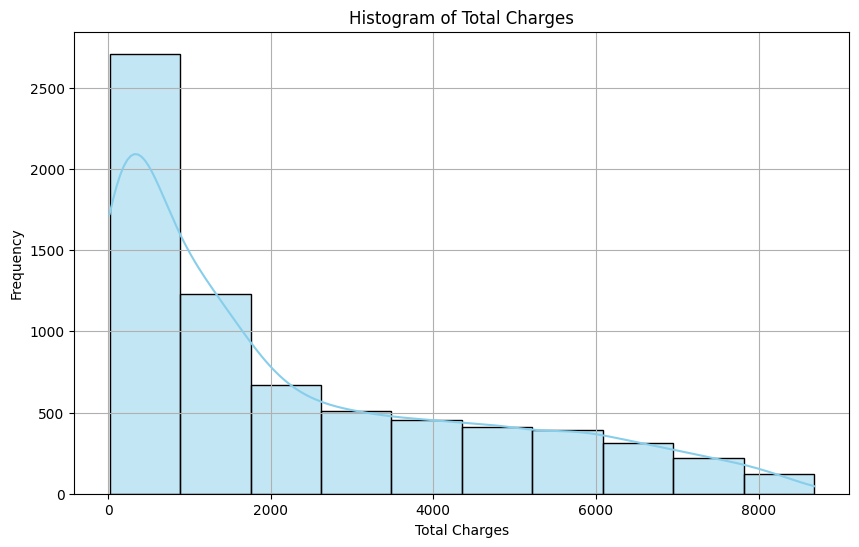

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], bins=10, color='skyblue', kde=True)
plt.title('Histogram of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.grid()
plt.show()

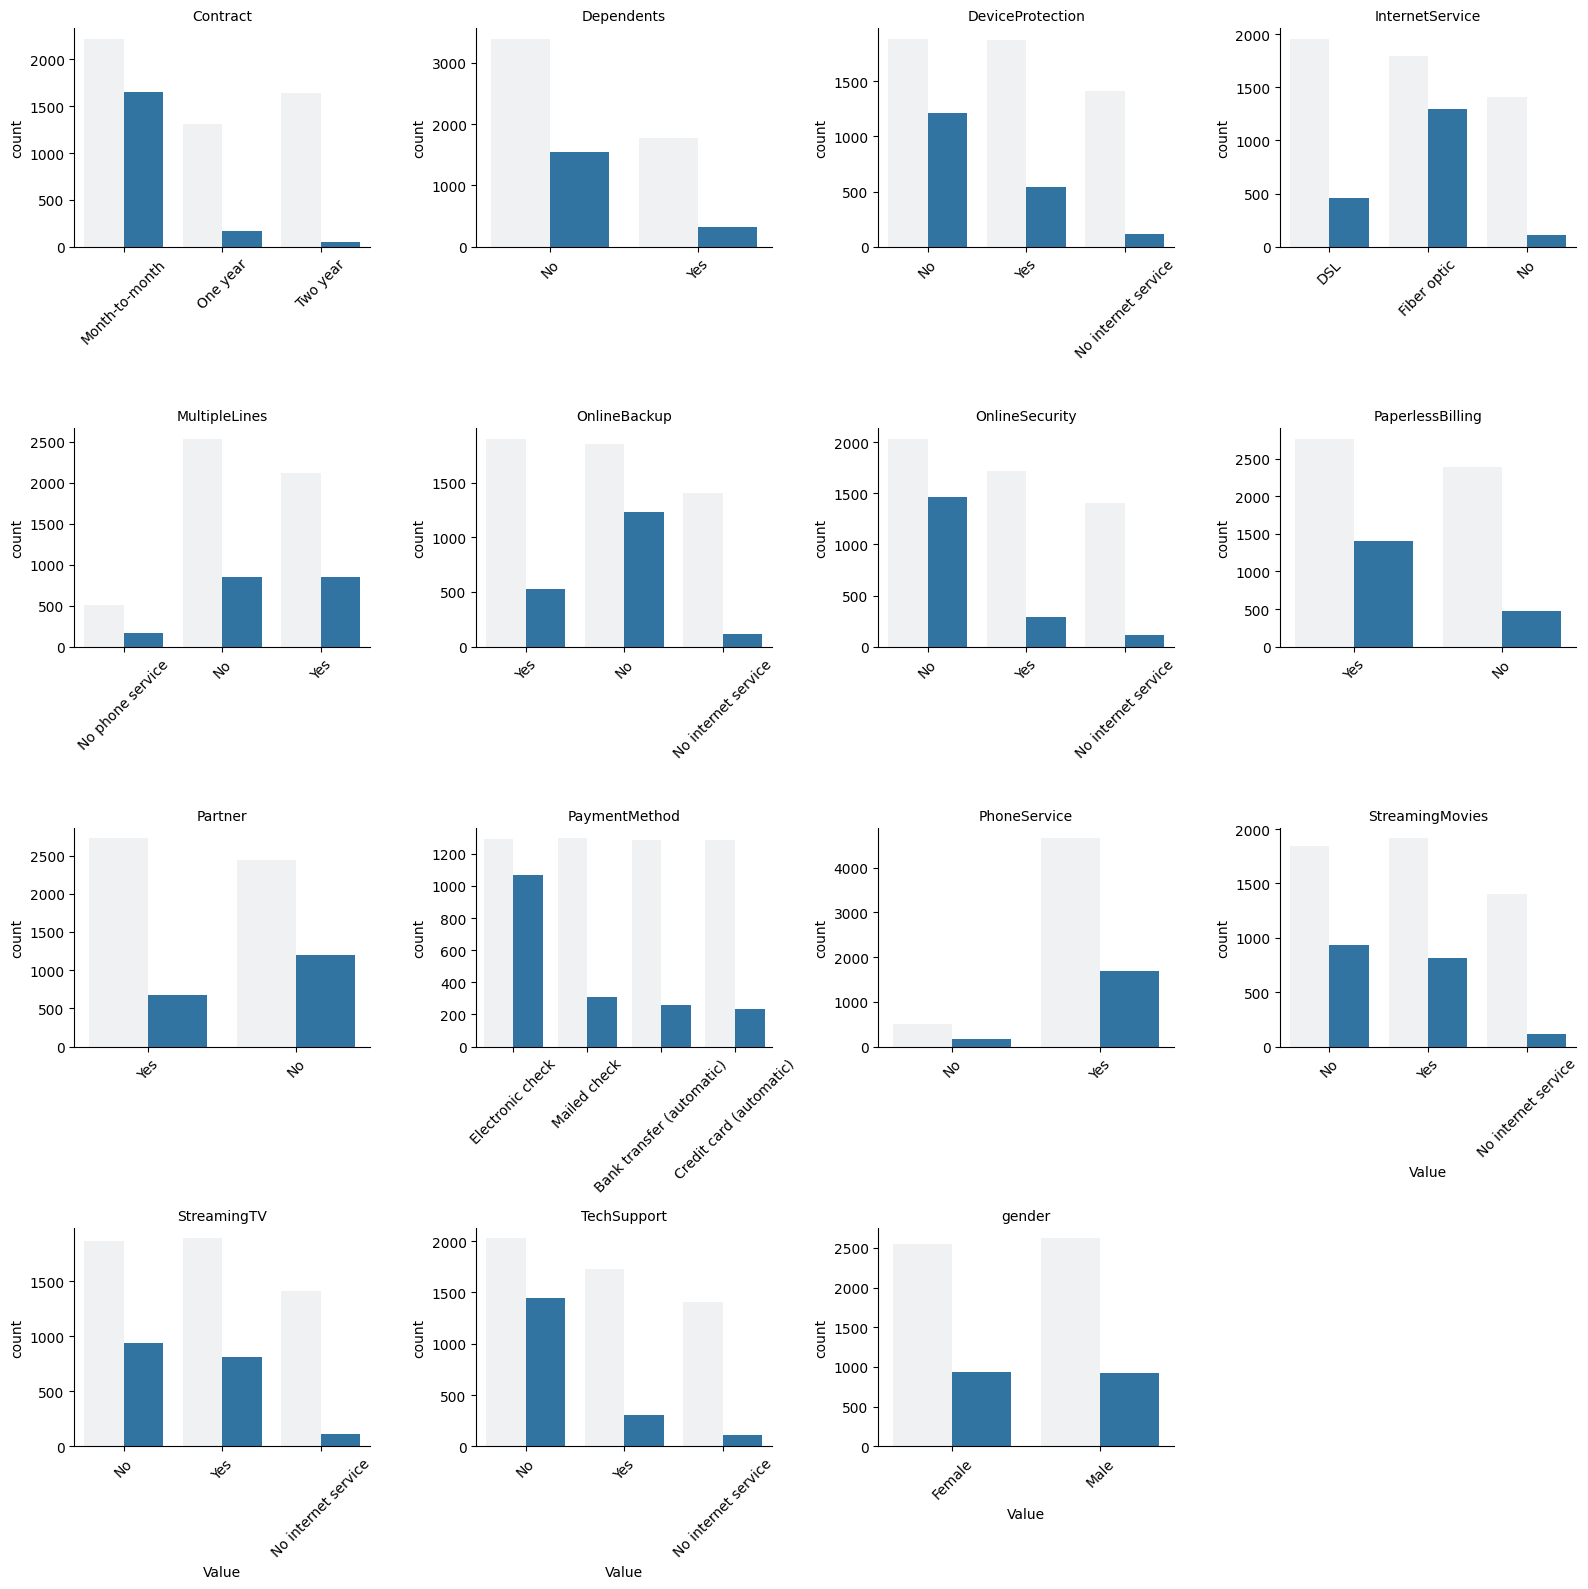

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.difference(['Churn'])

df_melted = df.melt(id_vars='Churn', value_vars=categorical_cols, var_name='Category', value_name='Value')

g = sns.FacetGrid(df_melted, col='Category', col_wrap=4, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x='Value', hue='Churn')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()


<span style="color: blue; font-size: 15px;">

- Contract:

    Higher Churn for Month to Month

- DeviceProtection:

    Higher Churn for No

- InternetService:

    Higher Churn for Fiber Optic

- OnlineBackup:

    Higher Churn for No

- OnlineSecurity:

    Higher Churn for NO

- PaperlessBilling:

    Higher Churn for Yes

- Partner:

    Higher Churn for No

- PaymentMethod:

    Higher Churn for ElectronicCheck

- TechSupport:

    Higher Churn for No

<span style="color: blue; font-size: 15px;">

We can remove columns: Dependents, MultipleLines, PhoneService, StreamingMovies, StreamingTV, gender

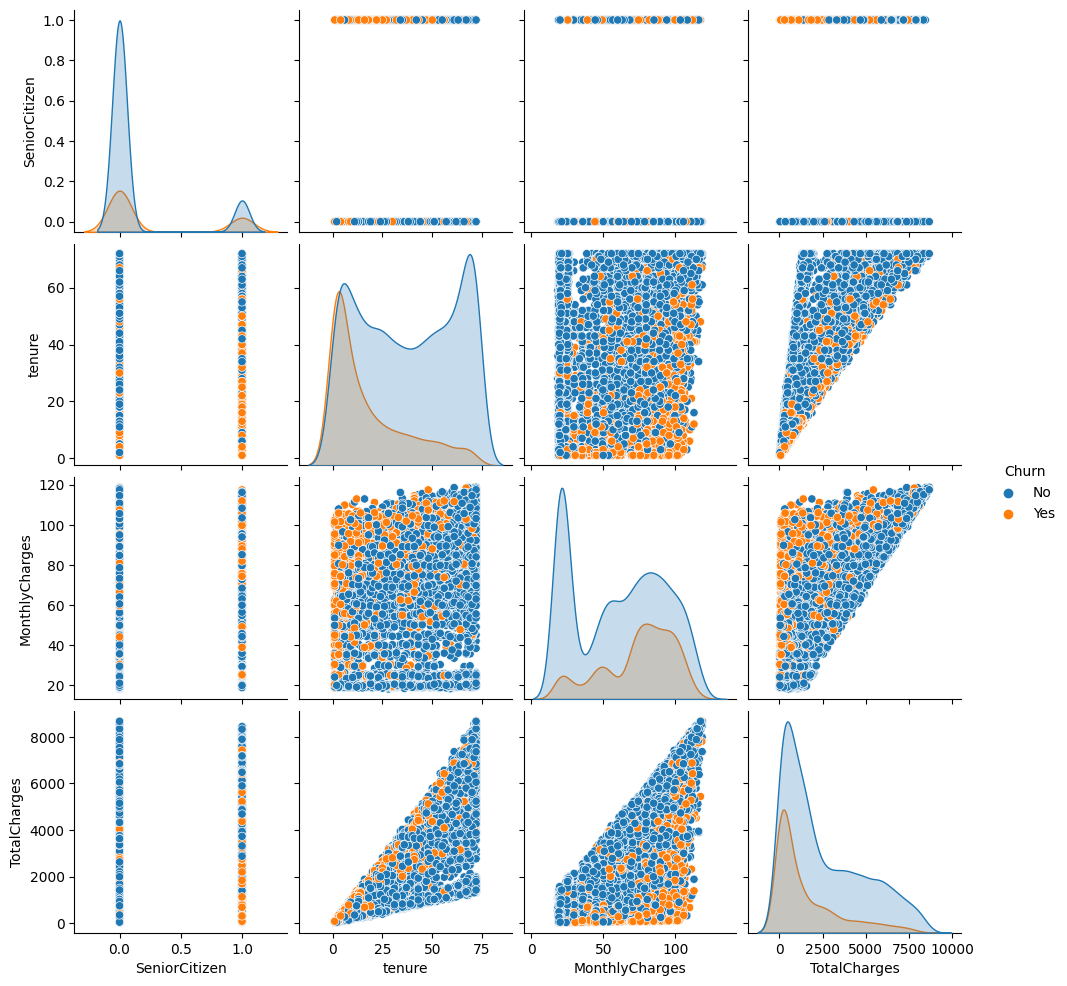

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df, vars=numerical_cols, hue='Churn')
plt.show()

<span style="color: blue; font-size: 15px;">

- Tenure:
    
    The distribution for the customers who churned and for those who did not is not the same

<span style="color: blue; font-size: 15px;">

We can remove columns: SeniorCitizen, TotalCharges

In [13]:
df = df.drop(columns=['SeniorCitizen', 'TotalCharges', 'Dependents', 'MultipleLines', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'gender'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partner           7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   InternetService   7032 non-null   object 
 3   OnlineSecurity    7032 non-null   object 
 4   OnlineBackup      7032 non-null   object 
 5   DeviceProtection  7032 non-null   object 
 6   TechSupport       7032 non-null   object 
 7   Contract          7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  Churn             7032 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 714.2+ KB


In [15]:
def print_unique_columns_values(dataframe):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column} : {df[column].unique()}') 
                
print_unique_columns_values(df)

Partner : ['Yes' 'No']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<span style="color: blue; font-size: 15px;">

We need to convert to numeric data ('Partner', 'InternetService', 'OnlineSecurity','OnlineBackup',
'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn')

<span style="color: blue; font-size: 15px;">

- Binary Variables: Partner, PaperlessBilling, Churn

- Ordinal Variables: Contract

- Nominal Variables: InternetServices, PaymentMethod

- For variables with 'No internet service' we can change it to 'No'

In [16]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

In [17]:
for col in ['Partner', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'PaperlessBilling','Churn']:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [18]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)

In [19]:
df = pd.get_dummies(df, columns=['InternetService', 'PaymentMethod'], drop_first=True).astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Partner                                7032 non-null   int32
 1   tenure                                 7032 non-null   int32
 2   OnlineSecurity                         7032 non-null   int32
 3   OnlineBackup                           7032 non-null   int32
 4   DeviceProtection                       7032 non-null   int32
 5   TechSupport                            7032 non-null   int32
 6   Contract                               7032 non-null   int32
 7   PaperlessBilling                       7032 non-null   int32
 8   MonthlyCharges                         7032 non-null   int32
 9   Churn                                  7032 non-null   int32
 10  InternetService_Fiber optic            7032 non-null   int32
 11  InternetService_No                 

Churn
0    5163
1    1869
Name: count, dtype: int64


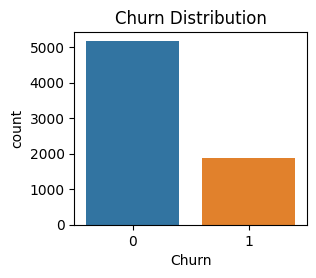

In [21]:
print(df['Churn'].value_counts())

plt.figure(figsize=(3, 2.5))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

<span style="color: blue; font-size: 15px;"> 

We notice an imbalance between the number of Yes and No for Churn

<span style="color: blue; font-size: 30px;"> 
Machine Learning Section

<span style="color: blue; font-size: 15px;"> 

- First duplicate the data and normalise it

- Second split the data into training data and testing data

<span style="color: blue; font-size: 15px;"> 

The imbalance can be problematic since it might cause the models to predict "no churn" more since it is the majority class. In fact, the accuracy and especially the f1 scores where very low (~ 0.50) for all methods tested below.

Solutions: Oversampling the minority class ("Churn == 1") by using SMOTE

In [22]:
X = df.drop(columns='Churn') 
y = pd.DataFrame(df.Churn).values.reshape(7032, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (5625, 14)
X_test: (1407, 14)
y_train: (5625, 1)
y_test: (1407, 1)


In [23]:
X_smote, y_smote = SMOTE(sampling_strategy='minority').fit_resample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=6, stratify=y_smote)
print(f"X_train SMOTE: {X_train.shape}")
print(f"X_test SMOTE: {X_test.shape}")
print(f"y_train SMOTE: {y_train.shape}")
print(f"y_test SMOTE: {y_test.shape}")

X_train SMOTE: (8260, 14)
X_test SMOTE: (2066, 14)
y_train SMOTE: (8260,)
y_test SMOTE: (2066,)


In [25]:
def trainmodel(model, parameters, X_train, y_train, X_test, y_test):

    grid = GridSearchCV(model,
                        param_grid=parameters,
                        refit=True,
                        cv=KFold(shuffle=True, random_state=6),
                        n_jobs=-1)

    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_test_pred = grid_fit.predict(X_test)

    train_score = grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    classification_report = metrics.classification_report(y_test, y_test_pred)
    f1_score = metrics.f1_score(y_test, y_test_pred)

    model_name = str(model).split('(')[0]

    print(f"{model_name}:")
    print(f"Best parameters: {grid_fit.best_params_}\n")
    print(f"Accuracy training set: {train_score:0.2%}")
    print(f"Accuracy testing set: {test_score:0.2%}")
    print(f"F1 score: {f1_score:0.2%}\n")
    print(classification_report)


<span style="color: blue; font-size: 15px;"> 

- Below are the methods used where sclaing the data is not required:

    Decision Trees

    Random Forest

    XGBoost

In [26]:
dt_parameters = {
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

trainmodel(DecisionTreeClassifier(random_state=6), dt_parameters, X_train, y_train, X_test, y_test)


DecisionTreeClassifier:
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}

Accuracy training set: 84.38%
Accuracy testing set: 80.40%
F1 score: 81.08%

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1033
           1       0.78      0.84      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



In [27]:
rf_parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 7],
}

trainmodel(RandomForestClassifier(random_state=6), rf_parameters, X_train, y_train, X_test, y_test)

RandomForestClassifier:
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Accuracy training set: 93.77%
Accuracy testing set: 82.72%
F1 score: 82.84%

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1033
           1       0.82      0.83      0.83      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [28]:
xgb_parameters = {
    'n_estimators': [30, 50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [1, 3, 5, 7],
}

trainmodel(XGBClassifier(random_state=6), xgb_parameters, X_train, y_train, X_test, y_test)

XGBClassifier:
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Accuracy training set: 92.40%
Accuracy testing set: 82.58%
F1 score: 82.99%

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1033
           1       0.81      0.85      0.83      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



<span style="color: blue; font-size: 15px;"> 

- Below are the methods where scaling is required:

    Log Reg

    MLP

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))

normal = scaler.fit_transform(df)

df = pd.DataFrame(normal, columns= df.columns)

In [30]:
lr_parameters = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear'],
}

trainmodel(LogisticRegression(random_state=6), lr_parameters, X_train, y_train, X_test, y_test)

LogisticRegression:
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Accuracy training set: 80.33%
Accuracy testing set: 79.91%
F1 score: 80.25%

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1033
           1       0.79      0.82      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [31]:
mlp_model = MLPClassifier(random_state=6, max_iter=500)

mlp_parameters = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

trainmodel(mlp_model, mlp_parameters, X_train, y_train, X_test, y_test)

MLPClassifier:
Best parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

Accuracy training set: 82.17%
Accuracy testing set: 81.07%
F1 score: 80.81%

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1033
           1       0.82      0.80      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



<span style="color: blue; font-size: 20px;"> 
Conclusion

<span style="color: blue; font-size: 15px;">
It appears that withthis dataset, 3 models out of 4 tested achieve around 82% accuracy in the training set and f1 score which is satisfying

Using SMOTE and GridSearchCV to find the optimal parameters for each model tested was necessary



references:

- https://www.jeremyjordan.me/hyperparameter-tuning/

- https://scikit-learn.org/stable/modules/grid_search.html

- https://medium.com/biased-algorithms/grid-search-for-decision-tree-ababbfb89833
    